<a href="https://colab.research.google.com/github/sungjea713/FMCW/blob/master/FMCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>FMCW</h2>



![대체 텍스트](https://github.com/sungjea713/FMCW/blob/master/Images/1x/FMCW_NODOPPLER.png?raw=true)

$f_0$:Carrier frequency

$f_B$:Beat frequency

$$f_T(t)=f_0+\frac{f_{sw}}{T_{chirp}}t$$

$$f_R(t)=f_0+\frac{f_{sw}}{T_{chirp}}(t-\tau)$$
$$\phi(t)=2\pi\int_{}^{}f(t)dt=2\pi\left(f_0t+\frac{1}{2}\frac{f_{sw}}{T_{chirp}}t^2\right)$$

$$f_B=f_T-f_R=\frac{f_{sw}\tau}{T_{chirp}}=\frac{f_{sw}2R}{T_{chirp}c}$$

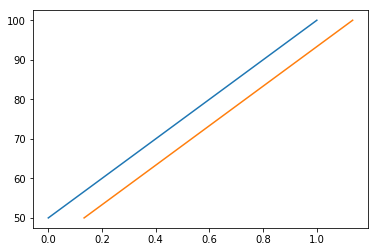

In [209]:
'''single FMCW'''
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy import signal

def TransmitSignal(x):
  return fsw*(signal.sawtooth(2*np.pi/Tchirp*x)+1)/2 +f0

def ReceiveSignal(x):
  return fsw*(signal.sawtooth(2*np.pi/Tchirp*(x-tau))+1)/2 +f0

Tchirp = 1
fsw = 50
f0 = 50
fs = 20000
R = 2e7
c = 3e8
tau = 2*R/c
tauIndex = round(tau*fs)

tT = [x for x in np.arange(0.0, 1.0, Tchirp/fs)]
tR = [x for x in np.arange(0.0, 1.0 + tau, Tchirp/fs)]
fT = [fsw*(signal.sawtooth(2*np.pi/Tchirp*x)+1)/2 +f0 for x in tT]
fR = []
for i in range(len(tR)):
  fR.append(None)
  if i>= tauIndex:
    fR[i] = fT[i-tauIndex]

plt.plot(tT, fT, tR, fR)

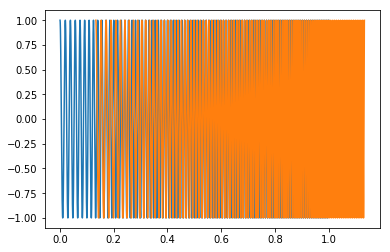

In [210]:
sT = []
sR = []
for i in range(len(fT)):
  sT.append(math.cos(2*math.pi*fT[i]*tT[i]))
for i in range(len(fR)):
  sR.append(None)
  if i>=tauIndex:
    sR[i] = math.cos(2*math.pi*fT[i-tauIndex]*tT[i-tauIndex])
    
plt.plot(tT, sT, tR, sR)

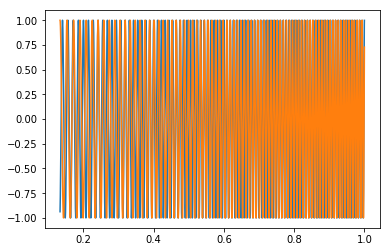

In [211]:
tClip = []
sTClip = []
sRClip = []
for i in range(len(tT)):
  if i >= tauIndex:
    tClip.append(tT[i])
    sTClip.append(sT[i])
    sRClip.append(sR[i])
plt.plot(tClip, sTClip, tClip, sRClip)

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 40000 is greater than input length  = 17333, using nperseg = 17333
  .format(nperseg, input_length))


13.846420123463913
41539260.37039174


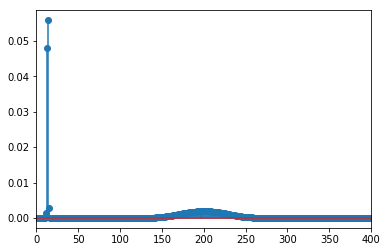

In [213]:
sMixed=[]
for i in range(len(sTClip)):
  sMixed.append(sTClip[i]*sRClip[i])

fp, Pxx_den = signal.welch(sMixed, fs, nperseg=40000)
plt.stem(fp, Pxx_den)
plt.xlim(0, 400)
plt.plot

for i in range(len(Pxx_den)):
  if Pxx_den[i] == max(Pxx_den):
    fB = fp[i]

print(fB)
print((fB)*c*Tchirp/(2*fsw))


13.269485951652916
19904228.927479375


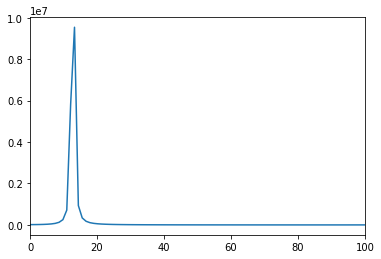

In [224]:
fx = [ x * fs /len(tClip) for x in np.arange(-len(tClip)/2, len(tClip)/2)]
yfft = abs(pow(fftshift(fft(sMixed)), 2))
plt.plot(fx, yfft)
plt.xlim(0, 100)

maxPower = max(yfft)

for i in range(len(yfft)):
  if yfft[i] == maxPower:
    fB = fx[i]
print(fB)

print(fB*c*Tchirp/(2*fsw)/2)